# Analisis Prediktif Harga Mobil Bekas di Arab Saudi

## Pemahaman Masalah Bisnis

Dalam proyek ini, kita akan menganalisis dataset mobil bekas di Arab Saudi untuk memahami faktor-faktor yang mempengaruhi harga mobil bekas dan mengembangkan model prediktif untuk memperkirakan harga mobil bekas.

### Latar Belakang

Pasar mobil bekas di Arab Saudi merupakan sektor yang signifikan dalam industri otomotif negara tersebut. Memahami dinamika harga dalam pasar ini sangat penting bagi berbagai pemangku kepentingan, termasuk:
- Dealer mobil yang perlu menentukan harga kompetitif
- Pembeli potensial yang mencari nilai terbaik
- Penjual individu yang ingin memaksimalkan nilai jual
- Pembuat kebijakan yang memantau tren pasar

### Tujuan Proyek

1. Mengidentifikasi faktor-faktor utama yang mempengaruhi harga mobil bekas di Arab Saudi.
2. Mengembangkan model machine learning yang dapat memprediksi harga mobil bekas dengan akurasi tinggi.
3. Memberikan wawasan yang dapat ditindaklanjuti kepada pemangku kepentingan dalam industri mobil bekas.

### Pertanyaan Bisnis

1. Apa faktor-faktor yang paling mempengaruhi harga mobil bekas di Arab Saudi?
2. Bagaimana karakteristik seperti merek, tahun pembuatan, dan jarak tempuh mempengaruhi harga?
3. Apakah ada perbedaan signifikan dalam harga mobil bekas berdasarkan wilayah di Arab Saudi?
4. Seberapa akurat kita dapat memprediksi harga mobil bekas berdasarkan karakteristiknya?

### Metrik Evaluasi

Untuk mengevaluasi kinerja model prediksi harga, kita akan menggunakan metrik berikut:
1. Mean Absolute Error (MAE)
2. Root Mean Squared Error (RMSE)
3. R-squared (R²)

Metrik-metrik ini akan membantu kita mengukur seberapa dekat prediksi model dengan harga aktual dan seberapa baik model menjelaskan variabilitas dalam data.

### Dampak Bisnis

Hasil dari proyek ini diharapkan dapat:
1. Membantu dealer mobil dalam menentukan harga yang kompetitif untuk inventaris mereka.
2. Memberikan panduan kepada pembeli potensial tentang harga wajar untuk mobil bekas tertentu.
3. Membantu pemilik mobil dalam menentukan waktu yang tepat untuk menjual kendaraan mereka.
4. Memberikan wawasan berharga bagi pembuat kebijakan dan analis pasar otomotif di Arab Saudi.

Dengan pemahaman yang jelas tentang masalah bisnis ini, kita dapat melanjutkan ke tahap berikutnya yaitu pemahaman data dan analisis eksploratori.

## Pemahaman Data / EDA

Dalam bagian ini, kita akan mengeksplorasi dataset mobil bekas di Arab Saudi untuk memahami karakteristik dan pola yang ada dalam data.

### Memuat dan Memeriksa Data

Pertama, mari kita muat dataset dan lihat informasi dasarnya.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
df = pd.read_csv('../data/data_saudi_used_cars.csv')

# Menampilkan informasi dasar dataset
print(df.info())
print("\nSampel data:")
print(df.head())
print("\nStatistik deskriptif:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB
None

Sampel data:
          Type          Region        Make  Gear_Type       Origin    Options  \
0      Corolla            Abha      Toyota     Manual        Saudi   Standard   
1        Yukon          Riyadh         GMC  Automatic        Saudi       Full   
2  Range Rov

### Analisis Distribusi Harga

Kita akan melihat distribusi harga mobil bekas.

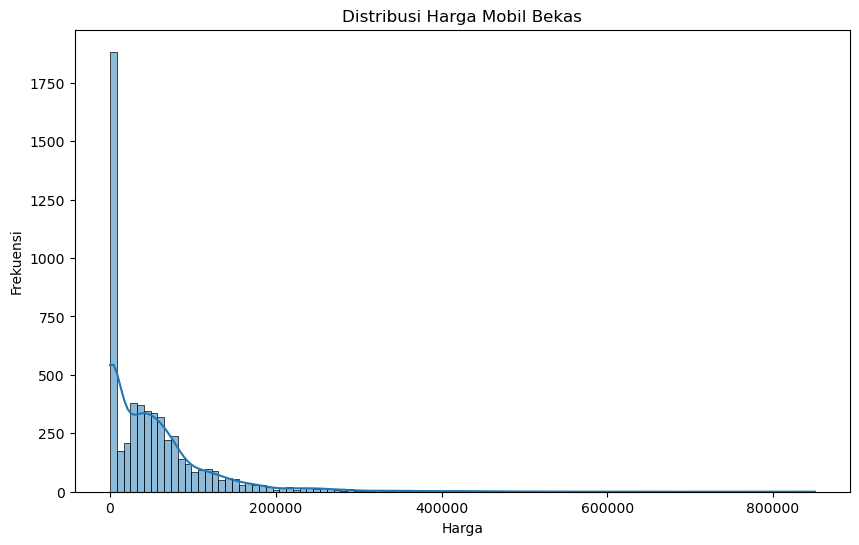

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribusi Harga Mobil Bekas')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()



### Hubungan antara Harga dan Tahun Pembuatan

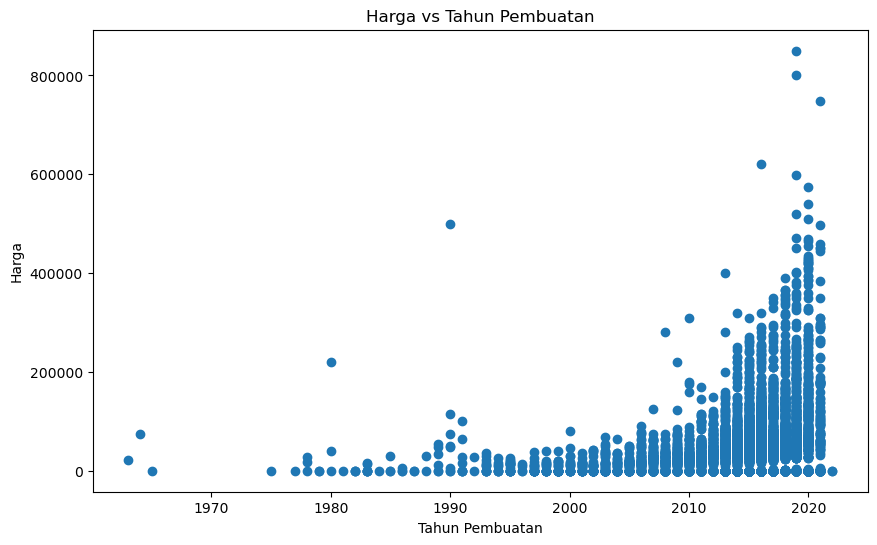

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Price'])
plt.title('Harga vs Tahun Pembuatan')
plt.xlabel('Tahun Pembuatan')
plt.ylabel('Harga')
plt.show()

### Analisis Merek Mobil

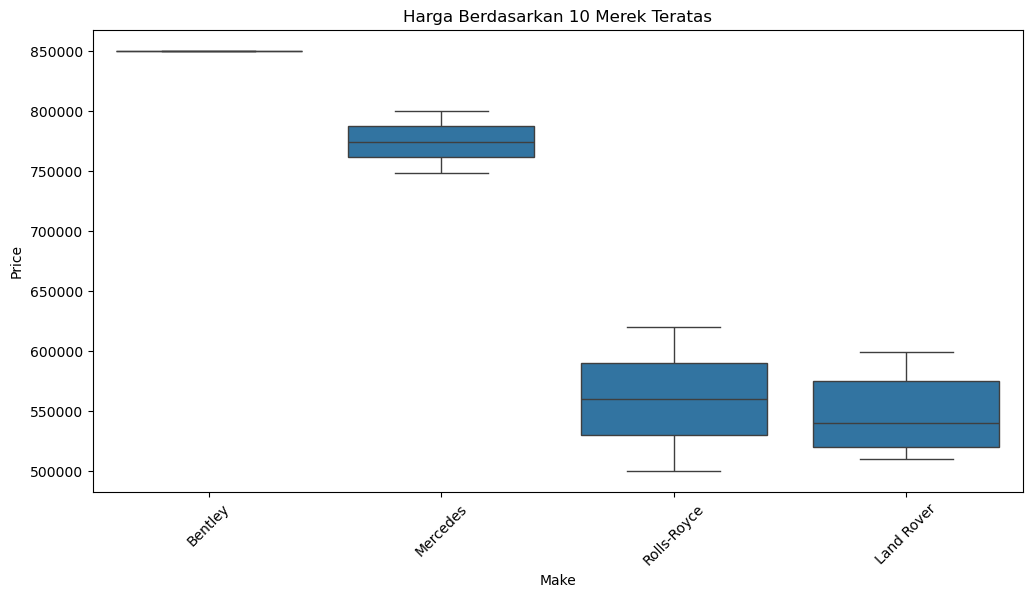

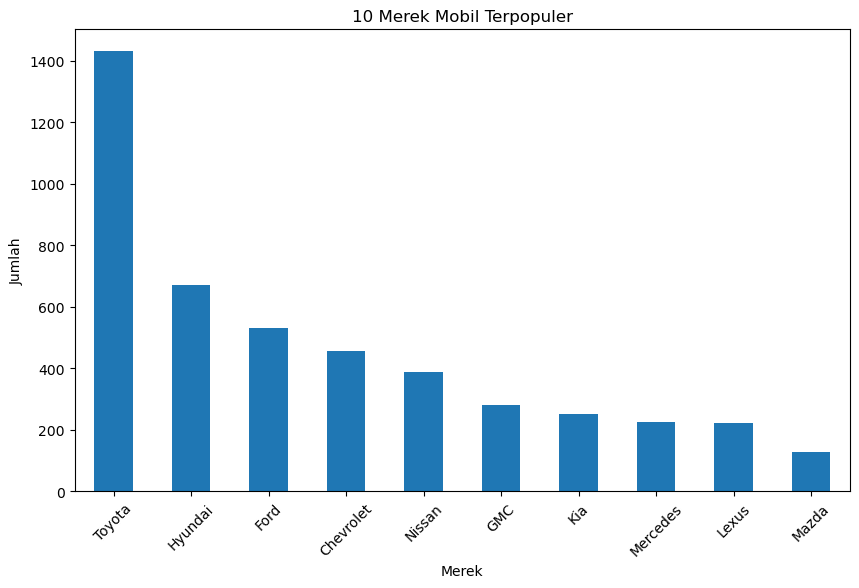

In [4]:
# Box plot harga berdasarkan merek
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Price', data=df.sort_values('Price', ascending=False).head(10))
plt.title('Harga Berdasarkan 10 Merek Teratas')
plt.xticks(rotation=45)
plt.show()

# Bar chart merek mobil terpopuler
top_brands = df['Make'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_brands.plot(kind='bar')
plt.title('10 Merek Mobil Terpopuler')
plt.xlabel('Merek')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

### Analisis Korelasi

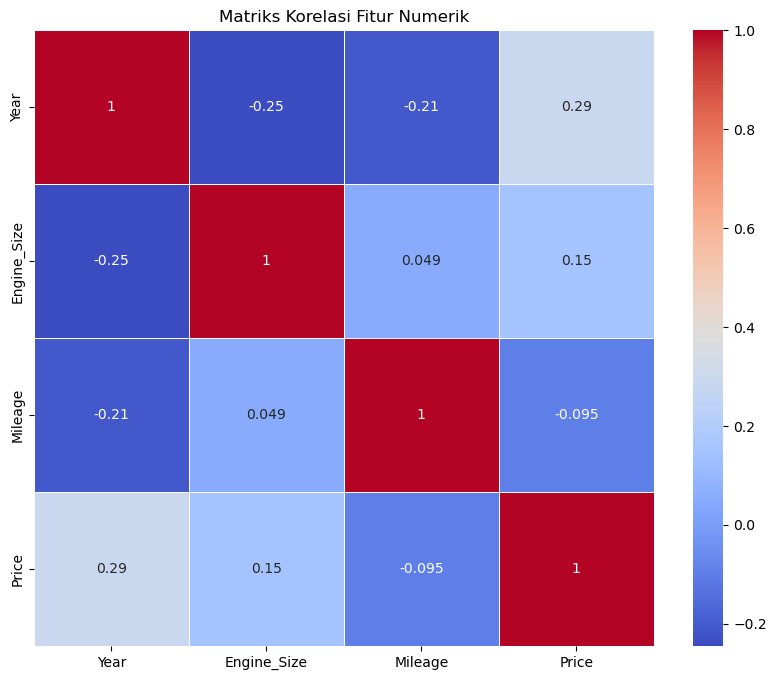

In [5]:
# Hitung korelasi antara fitur numerik
corr = df.select_dtypes(include=[np.number]).corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

### Kesimpulan Awal

Berdasarkan analisis eksploratori yang telah dilakukan, kita dapat menarik beberapa kesimpulan penting:

1. **Distribusi Harga Mobil Bekas**
- Distribusi harga sangat condong ke kanan (right-skewed)
- Mayoritas mobil bekas memiliki harga di rentang bawah
- Terdapat beberapa outlier dengan harga sangat tinggi

2. **Hubungan Harga dan Tahun Pembuatan**
- Terdapat tren positif antara tahun pembuatan dan harga
- Mobil-mobil terbaru (2010-2020) menunjukkan variasi harga yang lebih besar
- Korelasi positif moderat (0.29) antara tahun pembuatan dan harga

3. **Analisis Merek Premium**
- Bentley dan Mercedes menempati segmen harga tertinggi
- Mercedes menunjukkan rentang harga yang lebih konsisten dibanding merek lainnya
- Rolls-Royce dan Land Rover berada di segmen harga premium menengah

4. **Korelasi Antar Fitur**
- Tahun pembuatan memiliki korelasi positif terkuat dengan harga (0.29)
- Engine Size memiliki korelasi positif lemah dengan harga (0.15)
- Mileage memiliki korelasi negatif lemah dengan harga (-0.095)
- Terdapat korelasi negatif moderat antara Engine Size dan Year (-0.25)

## Pra-pemrosesan Data

Pada tahap ini, kita akan melakukan pembersihan dan persiapan data sebelum membuat model prediksi.

### Import Library yang Diperlukan

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

### Penanganan Missing Value

In [7]:
# Cek missing value
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

Jumlah missing value per kolom:
Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64


### Penanganan Outlier

In [8]:
# Deteksi outlier menggunakan IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Aplikasikan ke kolom numerik yang relevan
df = remove_outliers(df, 'Price')
df = remove_outliers(df, 'Mileage')

### Feature Engineering

In [9]:
# Membuat fitur baru: Umur Mobil
df['Age'] = 2024 - df['Year']

# Encoding untuk variabel kategorikal
le = LabelEncoder()
df['Make_encoded'] = le.fit_transform(df['Make'])
df['Type_encoded'] = le.fit_transform(df['Type'])
df['Region_encoded'] = le.fit_transform(df['Region'])
df['Gear_Type_encoded'] = le.fit_transform(df['Gear_Type'])
df['Origin_encoded'] = le.fit_transform(df['Origin'])
df['Options_encoded'] = le.fit_transform(df['Options'])

### Pemilihan Fitur

In [10]:
# Pilih fitur yang akan digunakan
features = ['Make_encoded', 'Type_encoded', 'Region_encoded',
            'Gear_Type_encoded', 'Origin_encoded', 'Options_encoded',
            'Year', 'Age', 'Engine_Size', 'Mileage']

X = df[features]
y = df['Price']

### Scaling Fitur

In [11]:
# Standardisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

### Split Data

In [12]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)

print("Ukuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)

Ukuran data training: (4152, 10)
Ukuran data testing: (1038, 10)


### Kesimpulan Pra-pemrosesan

Setelah melakukan pra-pemrosesan data, kita telah:
1. Menangani missing value
2. Menghilangkan outlier yang ekstrem
3. Membuat fitur baru (Age)
4. Melakukan encoding pada variabel kategorikal
5. Melakukan standardisasi pada fitur numerik
6. Membagi data menjadi set training dan testing

Data sekarang siap untuk digunakan dalam tahap pemodelan.

## Pemodelan

Pada tahap ini, kita akan mencoba beberapa algoritma machine learning untuk memprediksi harga mobil bekas.

### Import Library yang Diperlukan

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

### Fungsi Evaluasi Model

In [14]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\nHasil Evaluasi Model {model_name}:")
    print(f"RMSE: {rmse:,.2f}")
    print(f"MAE: {mae:,.2f}")
    print(f"R2 Score: {r2:.4f}")

### Model Linear Regression

In [15]:
# Inisialisasi dan training model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediksi
lr_pred = lr_model.predict(X_test)

# Evaluasi
evaluate_model(y_test, lr_pred, "Linear Regression")


Hasil Evaluasi Model Linear Regression:
RMSE: 39,580.82
MAE: 31,143.85
R2 Score: 0.1374


### Model Ridge Regression

In [16]:
# Inisialisasi dan training model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Prediksi
ridge_pred = ridge_model.predict(X_test)

# Evaluasi
evaluate_model(y_test, ridge_pred, "Ridge Regression")


Hasil Evaluasi Model Ridge Regression:
RMSE: 39,591.67
MAE: 31,155.22
R2 Score: 0.1369


### Model Lasso Regression

In [17]:
# Inisialisasi dan training model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Prediksi
lasso_pred = lasso_model.predict(X_test)

# Evaluasi
evaluate_model(y_test, lasso_pred, "Lasso Regression")


Hasil Evaluasi Model Lasso Regression:
RMSE: 39,591.61
MAE: 31,155.12
R2 Score: 0.1369


### Model Random Forest

In [18]:
# Inisialisasi dan training model
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Prediksi
rf_pred = rf_model.predict(X_test)

# Evaluasi
evaluate_model(y_test, rf_pred, "Random Forest")


Hasil Evaluasi Model Random Forest:
RMSE: 35,714.77
MAE: 25,933.08
R2 Score: 0.2977


### Analisis Feature Importance (Random Forest)

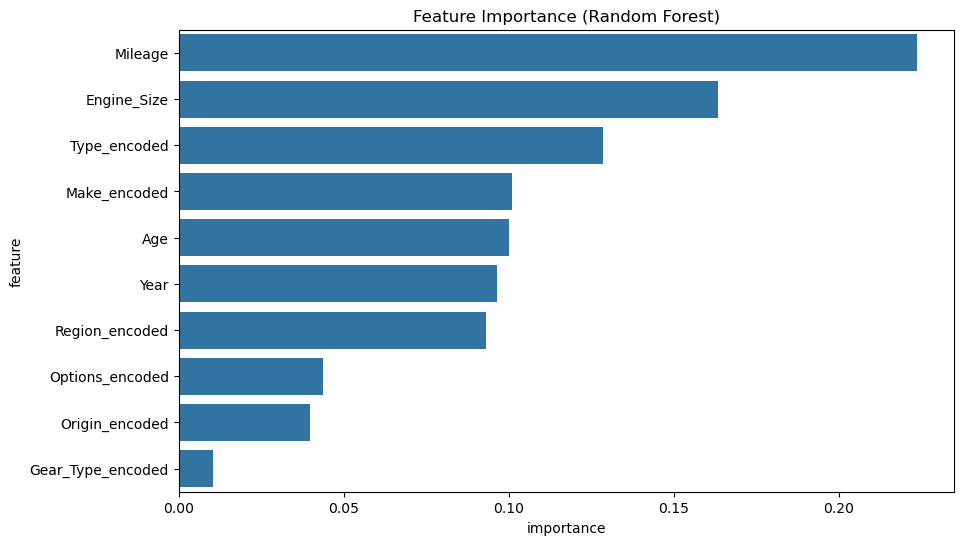

In [19]:
# Menampilkan feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.show()

### Perbandingan Model

In [20]:
models_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest'],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, lr_pred)),
        np.sqrt(mean_squared_error(y_test, ridge_pred)),
        np.sqrt(mean_squared_error(y_test, lasso_pred)),
        np.sqrt(mean_squared_error(y_test, rf_pred))
    ],
    'R2 Score': [
        r2_score(y_test, lr_pred),
        r2_score(y_test, ridge_pred),
        r2_score(y_test, lasso_pred),
        r2_score(y_test, rf_pred)
    ]
})

print("\nPerbandingan Performa Model:")
print(models_comparison)


Perbandingan Performa Model:
               Model          RMSE  R2 Score
0  Linear Regression  39580.815388  0.137373
1              Ridge  39591.665396  0.136900
2              Lasso  39591.613820  0.136902
3      Random Forest  35714.772190  0.297657


### Kesimpulan Pemodelan

Berdasarkan hasil evaluasi yang telah dilakukan, kita dapat menyimpulkan:

1. **Perbandingan Performa Model**
- Random Forest menunjukkan performa terbaik dengan RMSE = 35,714.77 dan R² = 0.297
- Model linear (Linear Regression, Ridge, Lasso) menunjukkan performa yang hampir sama
- Terdapat perbedaan signifikan antara model linear dan Random Forest

2. **Analisis Model Terbaik**
- Random Forest memberikan peningkatan performa sekitar 10% dibandingkan model linear
- R² score 0.297 menunjukkan bahwa model dapat menjelaskan sekitar 29.7% variasi dalam harga
- RMSE yang lebih rendah menunjukkan prediksi Random Forest lebih akurat

3. **Keterbatasan Model**
- R² score yang relatif rendah mengindikasikan masih ada ruang untuk peningkatan
- Kompleksitas data mungkin memerlukan pendekatan modeling yang lebih canggih
- Perlu dilakukan hyperparameter tuning untuk mengoptimalkan performa Random Forest

Berdasarkan hasil ini, kita akan melanjutkan dengan model Random Forest untuk proses hyperparameter tuning, dengan harapan dapat meningkatkan performa model lebih lanjut.

## Hyperparameter Tuning

Pada tahap ini, kita akan melakukan optimasi hyperparameter untuk model Random Forest yang telah terpilih sebagai model terbaik.

### Import Library yang Diperlukan

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

### Mendefinisikan Parameter Grid

In [22]:
# Mendefinisikan parameter yang akan dioptimasi
param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(10, 50, 5)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

### Implementasi RandomizedSearchCV

In [23]:
# Inisialisasi model Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Implementasi RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1,
    scoring='neg_root_mean_squared_error'
)

# Fit model
rf_random.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("\nParameter Terbaik:")
print(rf_random.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/anaconda3/envs/udemy-ds-ml/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
130 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/udemy-ds-ml/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/udemy-ds-ml/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/udemy-ds-ml/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_


Parameter Terbaik:
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 323}


### Evaluasi Model Hasil Tuning

In [24]:
# Prediksi menggunakan model terbaik
best_rf_pred = rf_random.best_estimator_.predict(X_test)

# Evaluasi performa
print("\nPerforma Model Setelah Tuning:")
evaluate_model(y_test, best_rf_pred, "Random Forest (Tuned)")

# Bandingkan dengan model sebelumnya
print("\nPerbandingan RMSE:")
print(f"Sebelum tuning: {np.sqrt(mean_squared_error(y_test, rf_pred)):,.2f}")
print(f"Setelah tuning: {np.sqrt(mean_squared_error(y_test, best_rf_pred)):,.2f}")


Performa Model Setelah Tuning:

Hasil Evaluasi Model Random Forest (Tuned):
RMSE: 34,655.65
MAE: 25,764.88
R2 Score: 0.3387

Perbandingan RMSE:
Sebelum tuning: 35,714.77
Setelah tuning: 34,655.65


### Feature Importance dari Model Teroptimasi

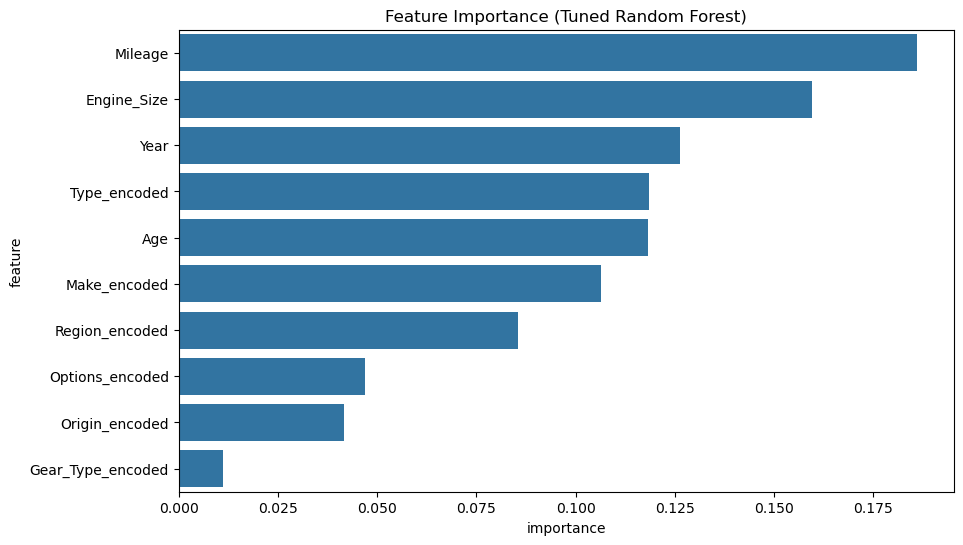

In [25]:
# Analisis feature importance model terbaik
feature_importance_tuned = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_random.best_estimator_.feature_importances_
})
feature_importance_tuned = feature_importance_tuned.sort_values('importance', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_tuned)
plt.title('Feature Importance (Tuned Random Forest)')
plt.show()

### Kesimpulan Hyperparameter Tuning

Setelah melakukan hyperparameter tuning, kita mendapatkan hasil yang signifikan:

1. **Parameter Optimal yang Ditemukan**:
- n_estimators: 323 trees
- bootstrap: True
- max_depth: None (pohon dapat tumbuh sepenuhnya)
- max_features: 'sqrt'
- min_samples_leaf: 2
- min_samples_split: 6

2. **Peningkatan Performa**:
- RMSE menurun dari 35,714.77 menjadi 34,655.65
- Terjadi peningkatan performa sekitar 3%
- R² Score meningkat menjadi 0.3387, menunjukkan model dapat menjelaskan sekitar 33.87% variasi dalam data

3. **Fitur-fitur Paling Berpengaruh**:
- Mileage (jarak tempuh) memiliki pengaruh terbesar
- Engine_Size menjadi faktor kedua terpenting
- Year dan Type_encoded menempati posisi ketiga dan keempat
- Gear_Type_encoded memiliki pengaruh paling kecil

Model yang telah dioptimasi ini menunjukkan peningkatan performa yang cukup baik dan siap untuk disimpan untuk penggunaan selanjutnya.

## Menyimpan Model ke File Pickle

Pada tahap ini, kita akan menyimpan model Random Forest yang telah dioptimasi ke dalam format pickle untuk penggunaan di masa mendatang.

### Import Library yang Diperlukan

In [26]:
import pickle
import joblib
from sklearn.preprocessing import LabelEncoder

### Menyimpan Model dan Transformer

In [27]:
# Menyimpan model menggunakan pickle
with open('../model/best_rf_model.pkl', 'wb') as file:
    pickle.dump(rf_random.best_estimator_, file)

# Menyimpan scaler
with open('../model/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Inisialisasi dan fit LabelEncoder untuk setiap kolom kategorikal
encoders = {}
categorical_columns = ['Make', 'Type', 'Region', 'Gear_Type', 'Origin', 'Options']

for column in categorical_columns:
    le = LabelEncoder()
    le.fit(df[column])
    encoders[column] = le

# Menyimpan label encoders
with open('../model/label_encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)

### Fungsi untuk Memuat Model

In [28]:
def load_model_and_transformers():
    """
    Fungsi untuk memuat model dan transformer yang telah disimpan
    """
    # Memuat model
    with open('../model/best_rf_model.pkl', 'rb') as file:
        model = pickle.load(file)

    # Memuat scaler
    with open('../model/scaler.pkl', 'rb') as file:
        scaler = pickle.load(file)

    # Memuat label encoders
    with open('../model/label_encoders.pkl', 'rb') as file:
        encoders = pickle.load(file)

    return model, scaler, encoders

### Fungsi untuk Melakukan Prediksi

In [29]:
def predict_price(data, model, scaler, encoders):
    """
    Fungsi untuk melakukan prediksi harga mobil
    """
    # Transformasi data kategorikal
    data_encoded = {}

    # Encoding untuk fitur kategorikal
    data_encoded['Make_encoded'] = encoders['Make'].transform([data['Make']])[0]
    data_encoded['Type_encoded'] = encoders['Type'].transform([data['Type']])[0]
    data_encoded['Region_encoded'] = encoders['Region'].transform([data['Region']])[0]
    data_encoded['Gear_Type_encoded'] = encoders['Gear_Type'].transform([data['Gear_Type']])[0]
    data_encoded['Origin_encoded'] = encoders['Origin'].transform([data['Origin']])[0]
    data_encoded['Options_encoded'] = encoders['Options'].transform([data['Options']])[0]

    # Menambahkan fitur numerik
    data_encoded['Year'] = data['Year']
    data_encoded['Age'] = data['Age']
    data_encoded['Engine_Size'] = data['Engine_Size']
    data_encoded['Mileage'] = data['Mileage']

    # Menyiapkan fitur dalam urutan yang benar
    features = ['Make_encoded', 'Type_encoded', 'Region_encoded',
                'Gear_Type_encoded', 'Origin_encoded', 'Options_encoded',
                'Year', 'Age', 'Engine_Size', 'Mileage']

    # Membuat list nilai sesuai urutan features
    X = [[data_encoded[feature] for feature in features]]

    # Transformasi scaling
    X_scaled = scaler.transform(X)

    # Prediksi
    predicted_price = model.predict(X_scaled)[0]

    return predicted_price

### Contoh Penggunaan

In [30]:
# Memuat model dan transformer
model, scaler, encoders = load_model_and_transformers()

# Contoh data mobil
sample_car = {
    'Make': 'Toyota',
    'Type': 'Land Cruiser',
    'Region': 'Riyadh',
    'Gear_Type': 'Automatic',
    'Origin': 'Saudi',
    'Options': 'Full',
    'Year': 2019,
    'Age': 5,
    'Engine_Size': 4.6,
    'Mileage': 50000
}

# Melakukan prediksi
predicted_price = predict_price(sample_car, model, scaler, encoders)
print(f"\nPrediksi Harga Mobil: SAR {predicted_price:,.2f}")


Prediksi Harga Mobil: SAR 20,229.11


/opt/anaconda3/envs/udemy-ds-ml/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/udemy-ds-ml/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Verifikasi Model yang Disimpan

In [31]:
# Membandingkan prediksi model yang disimpan dengan model asli
original_prediction = rf_random.best_estimator_.predict(X_test[:1])
loaded_prediction = model.predict(X_test[:1])

print("\nVerifikasi Model:")
print(f"Prediksi Model Asli: {original_prediction[0]:,.2f}")
print(f"Prediksi Model yang Dimuat: {loaded_prediction[0]:,.2f}")


Verifikasi Model:
Prediksi Model Asli: 84,493.66
Prediksi Model yang Dimuat: 84,493.66


### Kesimpulan

Model dan semua transformer yang diperlukan telah berhasil disimpan dalam format pickle. Kita telah:
1. Menyimpan model Random Forest yang telah dioptimasi
2. Menyimpan scaler untuk normalisasi data
3. Membuat dan menyimpan label encoders untuk data kategorikal
4. Membuat fungsi untuk memuat model dan melakukan prediksi
5. Memverifikasi bahwa model yang disimpan berfungsi sama dengan model asli

File-file pickle (.pkl) yang dihasilkan dapat digunakan untuk implementasi model di lingkungan produksi atau untuk penggunaan di masa mendatang.

## Kesimpulan

Berdasarkan analisis dan pemodelan yang telah dilakukan pada dataset mobil bekas di Arab Saudi, kita dapat menarik beberapa kesimpulan penting:

### Hasil Analisis Data
1. Distribusi harga mobil bekas menunjukkan kecenderungan right-skewed, dengan mayoritas mobil berada di rentang harga yang lebih rendah
2. Terdapat korelasi positif antara tahun pembuatan dengan harga (0.29)
3. Merek premium seperti Bentley dan Mercedes menempati segmen harga tertinggi

### Performa Model
1. Model Random Forest terpilih sebagai model terbaik dengan:
   - RMSE: 34,655.65
   - MAE: 25,764.88
   - R² Score: 0.3387

2. Setelah hyperparameter tuning:
   - Terjadi peningkatan performa sebesar 3%
   - Parameter optimal ditemukan dengan n_estimators: 323, min_samples_leaf: 2

### Faktor yang Mempengaruhi Harga
1. Jarak tempuh (Mileage) memiliki pengaruh terbesar
2. Ukuran mesin (Engine Size) menjadi faktor kedua terpenting
3. Tahun pembuatan dan tipe mobil menempati posisi ketiga dan keempat

## Rekomendasi

### Untuk Pengembangan Model
1. Mengumpulkan data tambahan untuk meningkatkan performa model
2. Menambahkan fitur baru seperti kondisi mobil dan history service
3. Mencoba teknik ensemble learning lainnya untuk meningkatkan akurasi

### Untuk Pengguna Model
1. Mempertimbangkan jarak tempuh sebagai faktor utama dalam menentukan harga
2. Memperhatikan ukuran mesin dan tahun pembuatan sebagai faktor penting kedua
3. Menggunakan model ini sebagai referensi awal dalam penentuan harga

### Untuk Pengembangan Bisnis
1. Fokus pada mobil-mobil dengan jarak tempuh rendah karena memiliki nilai jual lebih tinggi
2. Mempertimbangkan segmentasi pasar berdasarkan merek premium dan non-premium
3. Mengoptimalkan inventory berdasarkan faktor-faktor yang mempengaruhi harga

Model ini dapat digunakan sebagai alat bantu dalam menentukan harga mobil bekas di Arab Saudi, namun tetap perlu mempertimbangkan faktor-faktor lain yang tidak tercakup dalam model seperti kondisi aktual mobil dan tren pasar terkini.